# Linear Regression

In [113]:
# Generating a linear-looking dataset

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # Gaussian noise

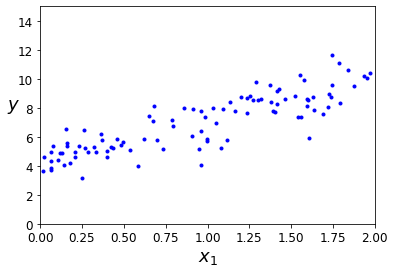

In [114]:
# Let's look at it visually 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

### Normal Equation

In [115]:
# Now we need to compute the value of 0 that minimizes the cost function using the Normal Equation
# Let's use inv() from np.linalg (numpy's linear algebra module) to inverse the matrix 


X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Let's see what it predicts (actuals are 4 and 3)

theta_best

array([[4.26096238],
       [2.86634411]])

In [116]:
# Let's use dot() method for the matrix multiplication

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

y_predict

array([[4.26096238],
       [9.9936506 ]])

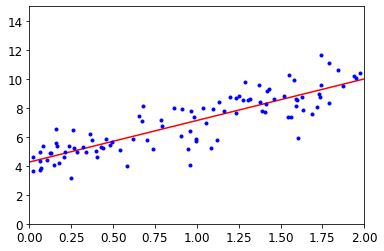

In [117]:
# Let's plot the predictions against the initial data

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Scikit-Learn LinearRegression

In [118]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.26096238]), array([[2.86634411]]))

In [119]:
# Let's predict

lin_reg.predict(X_new)

array([[4.26096238],
       [9.9936506 ]])

In [120]:
# Let's call scipy.linagl.ltstsq() [least squares] directly 

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.26096238],
       [2.86634411]])

In [121]:
# Computing the pseudoinverse directly 

np.linalg.pinv(X_b).dot(y)

array([[4.26096238],
       [2.86634411]])

### Batch Gradient Descent

In [122]:
# This ones trains over the entire set and will use specified learning rate and iterations to reach the local minima
# GridSearch can help find the ideal learning rate 

eta = 0.1 # Learning rate

n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iternation in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [123]:
theta

array([[4.26096238],
       [2.86634411]])

### Stochastic Gradient Descent

In [124]:
t = 0

n_epochs = 50
t0, t1 =5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + t)
        theta = theta - eta * gradients

In [125]:
theta

array([[4.28676491],
       [2.90496425]])

### Scikit-Learn SGDRegressor

In [126]:
# setting maximum iterations to 1000 or until the loss drops by less than 0.001 during one epoch
# starting learning rate is 0.1

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [127]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.22994646]), array([2.83011468]))

# Polynomial Regression

In [128]:
# Let's generate some non-linear looking data

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

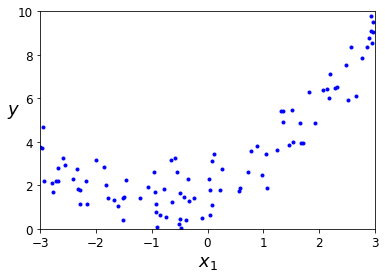

In [129]:
# Let's plot the above

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [130]:
# Let's use Scikit-Learn's PolynomialFeatures class to transform the data by adding the square to the feature 

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [131]:
X[0]

array([1.3522296])

In [132]:
X_poly[0]

array([1.3522296 , 1.82852489])

In [133]:
# Now we can run linear regression on it

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.75225247]), array([[0.98377514, 0.49474173]]))

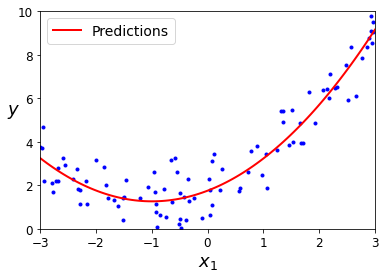

In [134]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

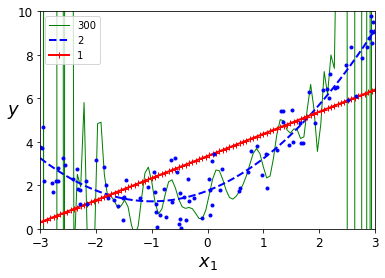

In [135]:
# Difference between pure Linear (1), Poly (degree = 2) and Poly (degree = 300)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

### Learning Curves

In [136]:
# Let's create a function that plots learning curves

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14) 
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

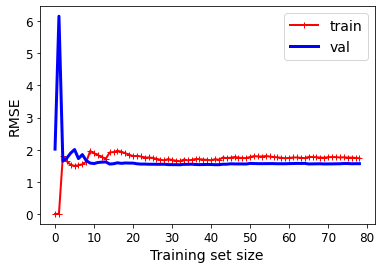

In [137]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

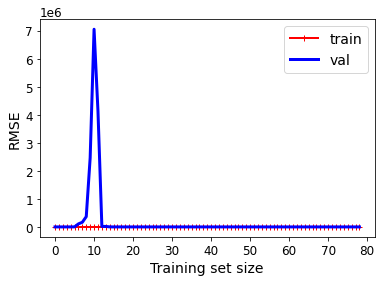

In [138]:
# Let's use a 10th degree polynomial model on the same data 

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg',LinearRegression())
])

# Let's plot the curve

plot_learning_curves(polynomial_regression, X, y)

# Regularization

### Ridge Regression

In [139]:
# Scikit-Learn's Ridge closed-form variation usiing Cholesky's matrix factorization technique

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.866955]])

In [140]:
# Using Stochastic Gradient Descent

sgd_reg = SGDRegressor(penalty='l2') # norm set to l2, which is essentially Ridge Regression
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.84336245])

### Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression

In [141]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.82285119])

In [142]:
# Using Stochastic Gradient Descent

sgd_reg = SGDRegressor(penalty='l1') # norm set to l1, which is essentially Lasso Regression
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.8658692])

### Elastic Net Regression
This is the middle ground (mix ratio) between Ridge and Lasso. When r = 0, its equivalent to Ridge and when r = 1, its equivalent to Lasso

In [143]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet( alpha=0.1, l1_ratio=0.5) #l1_ratio corresponds to the mix ratio of r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.82321017])

### Early Stopping 

To ensure the training stops when the cost function is at a minimum to avoid overfitting 

In [144]:
# stopping when the validation error has been above the minimum for some time is a good strategy
# of course rolling back to the minimum it was before that and selection the model parameters 

from sklearn.base import clone

#create the data

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

#prepare the data

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

#train the data

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [145]:
best_epoch, best_model

(243,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              tol=-inf, warm_start=True))

# Logistic Regression

In [148]:
# Let's load the Iris dataset

from sklearn import datasets

iris = datasets.load_iris()

list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [149]:
X = iris['data'][:, 3:] # petal width

In [150]:
y = (iris['target'] == 2).astype(np.int) # 1 if Iris Virginica, else 0

/var/folders/p6/rb44lpjs55z5ndqh27fc6w600000gn/T/ipykernel_48476/1143962707.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int) # 1 if Iris Virginica, else 0


In [162]:
# Let's train the model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

/opt/miniconda3/envs/ml_ds/lib/python3.10/site-packages/matplotlib/patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


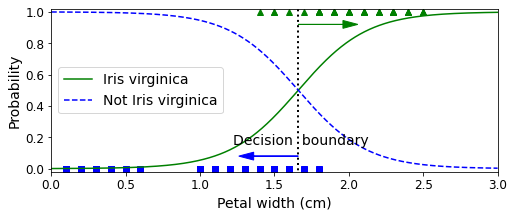

In [165]:
# Let's look at the model's estimated probablities for flowers (where petal width 0 - 3 cm)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)

plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris virginica')

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [166]:
# So the prediction will be Iris Virginica if petal width is above 1.5 cm

log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [169]:
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs', C=10) # C controls the norm which in default is l2
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [172]:
softmax_reg.predict([[5, 2]]) # outputs class 2 for Iris Virginica

array([2])

In [173]:
softmax_reg.predict_proba([[5, 2]]) # outputs 94% for Iris Virginica and 5.8% for anything else

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])